Mounted at /content/drive


<ipython-input-1-54a9030f77d4>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Coefficients: [   104.02630701 -26655.16535734  30014.32410896]
Intercept: 52261.74862694461
Mean Squared Error: 2806426667.247853
R-squared: 0.6341189942328371
Predicted House Price: [240377.51479736]


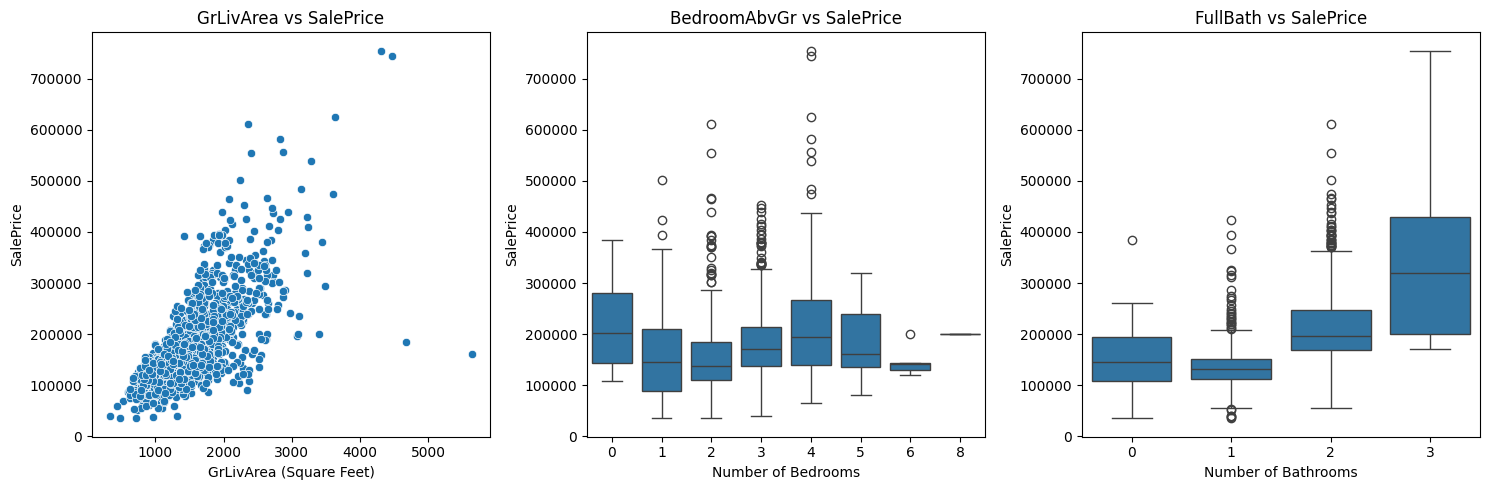

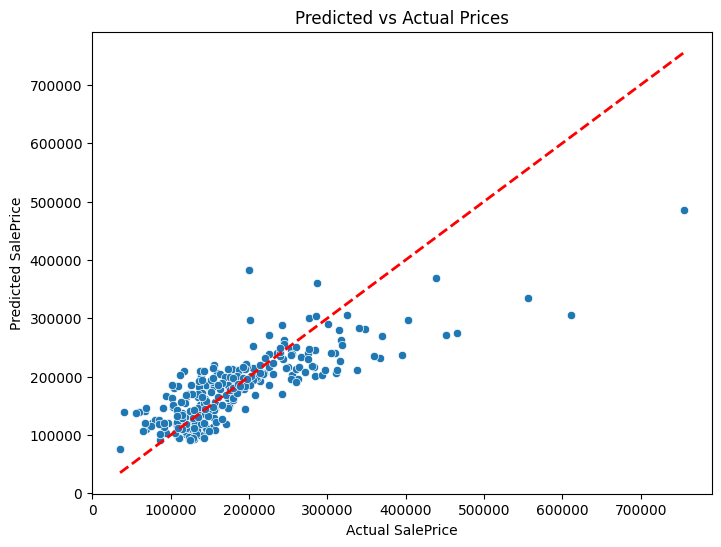

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from Google Drive
data = pd.read_csv('/content/drive/My Drive/train.csv')  # Replace with your file path in Google Drive

# Select relevant columns
selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Create feature matrix X and target vector y
X = data[selected_features]
y = data[target]

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predict for new data
new_data = pd.DataFrame({
    'GrLivArea': [2000],
    'BedroomAbvGr': [3],
    'FullBath': [2]
})

predicted_price = model.predict(new_data)
print("Predicted House Price:", predicted_price)

# Visualize the relationship between features and the target
plt.figure(figsize=(15, 5))

# Plot GrLivArea vs SalePrice
plt.subplot(1, 3, 1)
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea (Square Feet)')
plt.ylabel('SalePrice')

# Plot BedroomAbvGr vs SalePrice
plt.subplot(1, 3, 2)
sns.boxplot(x=data['BedroomAbvGr'], y=data['SalePrice'])
plt.title('BedroomAbvGr vs SalePrice')
plt.xlabel('Number of Bedrooms')
plt.ylabel('SalePrice')

# Plot FullBath vs SalePrice
plt.subplot(1, 3, 3)
sns.boxplot(x=data['FullBath'], y=data['SalePrice'])
plt.title('FullBath vs SalePrice')
plt.xlabel('Number of Bathrooms')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

# Visualize predicted vs actual prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()
